mengekstraksi feature image agar lebih bermakna, seperti feature apa aja yang mewakili semua data image kita ex: dahi, hidung, pipi, pencahayaan dll. sama seperti di deep learning, walaupun tidak sebagus deep learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns=100

In [3]:
df = pd.read_csv("data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,pixel_1-11,pixel_1-12,pixel_1-13,pixel_1-14,pixel_1-15,pixel_1-16,pixel_1-17,pixel_1-18,pixel_1-19,pixel_1-20,pixel_1-21,pixel_1-22,pixel_1-23,pixel_1-24,pixel_1-25,pixel_1-26,pixel_1-27,pixel_1-28,pixel_1-29,pixel_1-30,pixel_1-31,pixel_1-32,pixel_1-33,pixel_1-34,pixel_1-35,pixel_1-36,pixel_1-37,pixel_1-38,pixel_1-39,pixel_1-40,pixel_1-41,pixel_1-42,pixel_1-43,pixel_1-44,pixel_1-45,pixel_1-46,pixel_1-47,pixel_1-48,pixel_1-49,pixel_1-50,...,pixel_87-17,pixel_87-18,pixel_87-19,pixel_87-20,pixel_87-21,pixel_87-22,pixel_87-23,pixel_87-24,pixel_87-25,pixel_87-26,pixel_87-27,pixel_87-28,pixel_87-29,pixel_87-30,pixel_87-31,pixel_87-32,pixel_87-33,pixel_87-34,pixel_87-35,pixel_87-36,pixel_87-37,pixel_87-38,pixel_87-39,pixel_87-40,pixel_87-41,pixel_87-42,pixel_87-43,pixel_87-44,pixel_87-45,pixel_87-46,pixel_87-47,pixel_87-48,pixel_87-49,pixel_87-50,pixel_87-51,pixel_87-52,pixel_87-53,pixel_87-54,pixel_87-55,pixel_87-56,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,218,217,216,213,209,203,200,199,196,192,190,189,187,181,176,174,172,170,172,173,173,171,169,167,166,163,163,166,171,171,171,167,161,157,149,142,135,130,126,125,...,167,173,177,170,155,141,133,123,123,122,120,117,121,120,120,112,113,108,104,97,95,95,94,91,90,90,84,87,95,98,97,95,95,100,108,110,111,110,107,84,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,155,160,164,166,169,172,177,177,178,181,184,187,187,184,185,186,183,181,180,180,179,180,180,178,176,177,175,172,172,170,169,167,164,162,160,161,161,160,158,155,...,138,129,119,111,103,95,86,80,77,76,77,76,74,71,69,68,71,74,75,75,74,75,74,70,66,63,63,67,72,73,76,78,79,89,123,178,208,207,173,83,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,178,192,204,231,242,243,234,206,177,155,153,148,140,138,144,147,146,140,132,127,120,125,127,121,129,138,138,142,142,145,145,148,152,152,150,147,141,132,122,116,...,14,11,9,7,4,11,48,92,91,59,39,35,37,36,33,32,33,35,39,43,46,47,51,54,56,61,66,75,101,120,155,197,220,242,251,252,251,250,253,253,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,170,171,171,169,171,173,173,173,177,182,186,190,194,196,196,197,198,199,197,196,196,196,197,197,196,195,194,193,192,189,189,191,190,189,184,179,175,173,170,167,...,187,191,196,203,204,206,203,195,185,185,191,201,207,205,194,170,143,123,112,103,89,70,58,50,42,38,30,22,22,23,22,20,23,26,27,31,33,26,31,52,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,168,164,161,153,148,147,145,144,142,141,140,138,136,137,138,138,137,136,135,135,137,138,138,136,137,136,135,135,135,137,136,134,138,138,137,137,137,137,137,137,...,63,66,68,70,71,73,71,67,63,68,73,73,91,135,134,104,75,61,48,37,33,33,31,34,35,41,58,91,102,93,87,83,78,74,75,78,80,82,82,84,88,91,90,89,85,83,80,74,64,Alvaro Uribe


data kita udah dalam bentuk flatten dengan ukuran 87x65

lakukan train test split bukan karena mau klasifikasi, tapi karena data kita bentuk nya kategorikal.

# Dataset Spliting

In [4]:
X= df.drop(columns="name").values
y= df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

# Visualize Data

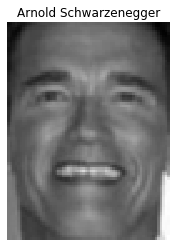

In [5]:
idx = 101
plt.imshow(X_train[idx].reshape(87,65), cmap="gray")
plt.title(y_train[idx])
plt.axis("off");

kita akan melakukan dekomposisi feature yang ada di image, yang mana dari data kita sebanyak 5655 kita akan coba ekstraksi feature nya. dengan dasar bahwa ada beberapa feature yang berulang seperti kerutan pada wajah seseorang itu bisa kita hilangkan untuk mengurangi feature. tapi informasi penting nya tetap terjaga

# Reduce dimentionality feature kita

In [6]:
from sklearn.decomposition import PCA, NMF


In [7]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'cumulative explained variance')

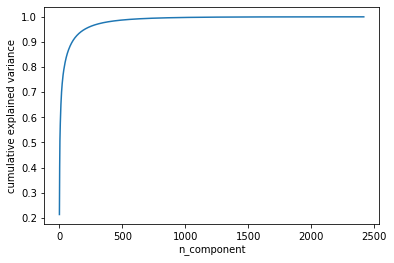

In [8]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_component")
plt.ylabel("cumulative explained variance")

coba pilih 500 feature sebagai reduce feature

In [9]:
pca = PCA(n_components=500,whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [10]:
print(X_train.shape) # seperti hidden layer
print(X_train_pca.shape) # weight / code
print(pca.components_.shape) # fitur maksud nya terdapat 500 feature yang datang dari 5655 feature

(2418, 5655)
(2418, 500)
(500, 5655)


pada image kita bisa visualisasi feature yang bermakna nya, karna image hanyalah kumpulan pixel, walaupun sudah kita reduce, tetap masih bisa kita plot feature nya. 
- beda dengan data data tabular biasa, yang kita akan susah memaknai feature hasil reduce nya

# coba visualisasi fitur n_component nya
- component pertama nya adalah yang paling penting maksud nya component ini ada di semua data kita (mewakili)

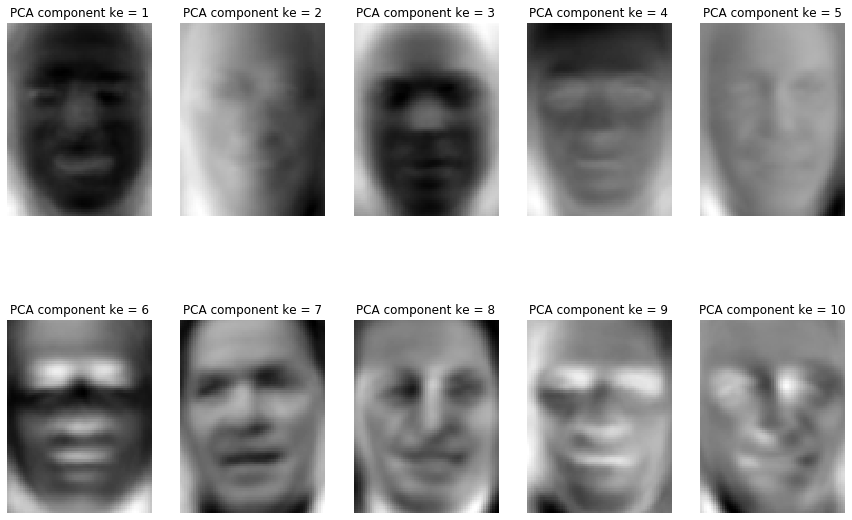

In [11]:
plt.figure(figsize=(15,10))
for i in range (10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87,65),cmap="gray")
    plt.title(f"PCA component ke = {i+1}")
    plt.axis("off")

kalau dianalisa bahwa feature komponen yang paling penting kita pertama adalah sisi background lalu ada pencahyaan dari kiri dan seterusnya

# Reconstruct data image
* coba kita invers data nya kembali seperti semula menggunakan 500 feature yang udah kita lakukan dimentionality reduction ini.
- seharus nya ada beberapa informasi yang hilang, seperti kerutan pada wajah

In [12]:
X_train_inv = pca.inverse_transform(X_train_pca)

(-0.5, 64.5, 86.5, -0.5)

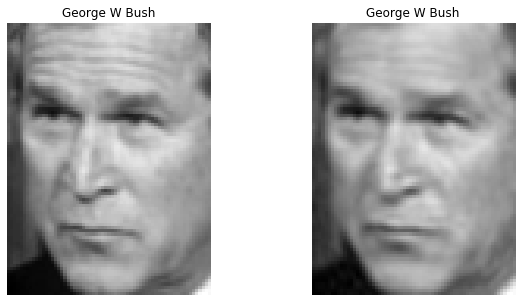

In [13]:
idx = 2
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(X_train[idx].reshape(87,65),cmap="gray")
plt.title(y_train[idx])
plt.axis("off")

plt.subplot(122)
plt.imshow(X_train_inv[idx].reshape(87,65),cmap="gray")
plt.title(y_train[idx])
plt.axis("off")


terlihat hasil dari sebelum di reduce dan setelah di reduce, informasi inti nya masih dipertahankan walaupun ada beberapa fitur ilang seperti kerutan agak sedikit hilang dan sedikit lebih blur. 
* tapi kita masih bisa mempertahankan informasi penting nya dan feature sudah menjadi lebih compact
* ide nya sama dengan cnn dulu dari banyak feature baru kita masukkan ke nn, ini juga sama ide  nya, 

# Rekonstruksi PCA = kombinasi linear dari komponen nya

* maksud dari 500 feature yang kita dapat tadi itu sama aja kita membuat code terhadap gambar yang ada, jadi kalau misal kita ingin verifikasi muka si A maka dengan hanya 500 code atau feature itu kita bisa mengenali muka si A dan dibalik layar kombinasi linear antara code dan feature yang ada untuk memverifikasi muka si A. 
* inti nya kita encode gambar atau data nya dari feature yang ada

kita sudah punya 500 kode dari beberapa data yang telah kita pca. maka jika kita punya data baru dan mau dicocok kan dengan feature yang telah kita PCA tadi sebenarnya bisa, coba kita praktek

In [14]:
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

In [20]:
soekarno1 = plt.imread("data/sample_faces/soekarno1.png").reshape(1,-1)
soekarno2 = plt.imread("data/sample_faces/soekarno2.png").reshape(1,-1)
hatta = plt.imread("data/sample_faces/hatta.png").reshape(1,-1)

In [21]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [24]:
cosine_similarity(s1,s2)

array([[0.99959696]])

In [25]:
cosine_similarity(s1,h1)

array([[0.99954032]])

coba search kemiripan data soekarno dengan data gambar kita

In [28]:
cosine_similarity(s1,X_train_pca)

array([[ 0.00641976, -0.02562865,  0.02828177, ..., -0.00150383,
         0.02667834,  0.00577162]])

In [29]:
similarity = cosine_similarity(s1,X_test_pca)

In [30]:
similarity.argsort()

array([[450, 154, 265, 203, 177, 148, 413, 116, 418, 457, 240, 196,  69,
        213, 315, 514, 589,  49, 340, 571, 479, 439, 524, 416, 231, 533,
         21,  54, 415, 310,   5,  13,  88, 393, 429, 163, 138, 150,  18,
         26, 362,  31, 338, 242, 189, 325, 217, 602, 218, 253, 179, 467,
        311, 199,  59, 369, 304,  34,  91, 263, 254, 476, 468, 184, 389,
        477, 206,  98,  73, 372, 585,  45, 578, 178, 584, 422, 305, 507,
        592, 293, 284, 400, 377, 534,  44, 183, 328, 200, 480, 408, 410,
        131, 334, 368, 271, 529,  19, 215, 252,  50, 454, 211, 378, 367,
        401, 144, 384, 201,  89,  63, 241, 243, 530, 308, 394, 563, 281,
        210, 357, 371, 596, 102,   7, 129, 162, 539, 537, 526, 567, 273,
        392,   6, 330, 385, 554, 300, 506, 347, 552, 202, 176, 331,  46,
        351, 130, 555, 492, 165, 124, 405, 140, 239, 352, 261, 488, 433,
        579, 264, 224,  30, 374, 106, 114, 587, 441, 145, 272, 570, 544,
        573, 421, 118, 521, 559,  81,  40, 286,  37

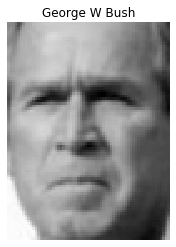

In [33]:
idx = 154
plt.imshow(X_train[idx].reshape(87,65), cmap="gray")
plt.title(y_train[idx])
plt.axis("off");

ini cara gunain nya sebagai model segampang kalau mau recognition atau classification tinggal flattening, lakuin PCA abis tuh masukin deh ke SVM atau algoritma lain nya udah deh tinggal pake tuh model untuk classification image yang baru
* tapi data yang kita jadiin data train itu harus related ya dengan apa yang ingin kita pake, gak kayak contoh ini dimana data nya muka orang luar tapi kita prediksi atau verifikasi muka orang indo